# Spring 2025 Final Report  #
## Evan Brody & Kerry Huang ##
## 05.14.2025 ##
## Prof. Lisa Hellerstein ##
\
**1. Background**\
Our research this semester focused around the representative problem in the field of stochastic boolean function evaluation, which concerns a function $f$ defined by
$$
f : [d]^n\rightarrow \{0,1\}
$$
$$
x\mapsto \begin{cases}
1 & \forall c\in[d](\exists i\in[n] : x_i = c)\\
0 & \text{otherwise}
\end{cases}
$$
That is, $f(x) = 1$ if every number from $1$ to $d$ is present in $x$, and $f(x) = 0$ otherwise. In the vector $x$, each entry is an independent random variable that takes on values in $[d]$ according to a given probability mass function (not necessarily identical between entries), and the cost of querying each variable is exactly $1$. Our investigation centered around finding efficient algorithms for generating provably cost-efficient strategies for evaluating $f$ given the probability mass function of each $x_i$.
\
\
**2. The Submodular Goal Function Approach**\
One approach to cost-efficient boolean function evaluation is to reduce the problem to submodular cover. In submodular cover, a finite set of elements (the "ground set" or "universe") is provided with along with a function termed the "goal function" that acts as an oracle for the value of any subset of the ground set. The goal in this case is to collect enough elements of the ground set to reach a predetermined goal value $\Gamma$, while minimizing the number of elements collected. The goal function must satisfy monotonicity, which entails that for any subsets $A\subseteq B\subseteq\mathcal{U}$ where $\mathcal{U}$ is the ground set,
$$
    u(A) \leq u(B)
$$
where $u : 2^\mathcal{U}\rightarrow\mathbb{Z}^{\geq0}$ is the goal function. Furthermore, the goal function must be submodular, which entails that for any $A\subseteq B\subseteq\mathcal{U}$ with $x\in\mathcal{U}$ such that $x\notin B$,
$$
    u(A\cup\{x\}) - u(A) \geq u(B\cup\{x\}) - u(B)
$$
That is, one cannot gain more value from a single element $x$ when adding it to some set as opposed to some subset of that set. In addition, $u$ must be such that
$$
    u(\varnothing) = 0
$$
$$
    u(\mathcal{U}) = \Gamma
$$
When applied to stochastic boolean function evaluation, the ground set consists of the parameters of the function to be evaluated, collecting an element corresponds to querying a parameter, and a goal function must be constructed as
$$
    u : \{*,0,1\}^n\rightarrow\mathbb{Z}^{\geq 0}
$$
where a vector in $\{*,0,1\}^n$ represents unknown parameters, parameters revealed to be $0$, and parameters revealed to be $1$. The requirement for monotonicity translates to the requirement that one cannot lose value by revealing a parameter; that is, for any $\alpha,\beta\in\{*,0,1\}^n$

\
**3. Dual Greedy**\
An additional Approach is to use dual greedy. 

## add in the approach and the simulation that falsifies this as a possibility


\
**4. Round Robin Approach**\
We start with some background necessary to create the round robin approach: \
Cost sensitive round robin is an approach to generate a strategy $S_{RR}$ from a set of j nonadaptive strategies $S_1 ... S_j \in S$ [Allen et al. 17] Round robin is defined as follows: \
Track the cost incurred by each strategy $c_i$ for each strategy $S_i$ such that initially $c_i = 0  \forall i\in [j]$. Let $d_i$ be the cost of the next test for each strategy. The next test of $S_{RR}$ should be the next test performed by the strategy $S_k$ such that:
$$S_k = \arg\min_{S_i} c_i + d_i$$
Our round robin may repeatedly test variables that have already been revealed. In this situation, we may "pay" for the cost of the test without obtaining more information. This is done to simplify the analysis. In reality, our round robin can skip tests that have already been performed to speed up computation and the cost of the strategy. Round robin has the property that the cost of our strategy is bounded by this inequality: 
$$cost(S_{RR},x) \leq j \max_{S_i} cost(S_i, x)$$

We also consider strategy trees and AND-OR trees. Strategy trees specify a strategy to evaluate a boolean vector, enabling adaptive and nonadaptive strategies. AND-OR trees are trees that represent a boolean function. For example, if we were to evaluate whether the boolean vector contains an instance of color $c$, our boolean function $f = y_1 \lor y_2 ... \lor y_j$ where $y_i = 1$ if $x_i$ evaluates to be $c$ and $y_i = 0$ otherwise. The diagram below represents the strategy and AND-OR tree for this problem. 




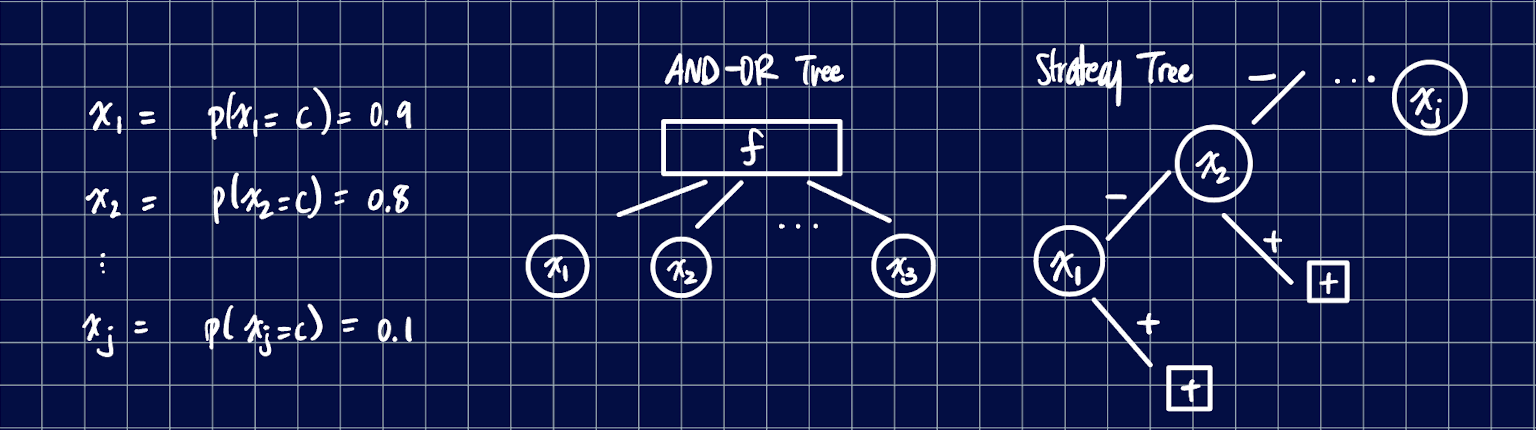

In [3]:
from IPython.display import Image, display

display(Image(filename='Trees.png'))

\
**Simulations**\
Let $S_c$ be a nonadaptive strategy ordering tests of $x_i$ in decreasing order of $p(x_i = c)$. $S_c$ is the optimal strategy to evaluate whether $c$ is within the boolean vector. Let $S_{RR}$ be the round robin strategy generated from $S_c \forall c \in [d]$. The optimal strategy $S^*$ is allowed to terminate early in the hopeless scenario-- when the number of tests left less than the number of representatives needed to reach $f(x) = 1$. Consequently, it is nonobvious at first how $S_c$ relates to $S^*$ since $S_c$ aims to find $c$ instead of collecting all representatives and does not have the luxury of terminating early. Our first instinct is to show that the round robin strategy is, in fact, not a d approximation to the optimal strategy through finding a counter example. We include simulations to find the counterexamples. 

We include a summary of the strategies employed to find the optimal strategy: 
1. There are 2 methods to calculate the expected value of any given strategy. Method 1 is to enumerate all possible vectors $x\in \{1, 2, ... [d]\}^n$ and calculate its probability. Afterwards, evaluate a given strategy's cost on $x$. Subsequently, weight the cost by the probability to get the expected cost of the strategy on all $x\sim D$. Method 1 has a runtime of $O(k^n * n)$.
2. Method 2 to calculate the expected value of any given strategy is to apply a Markov's process to calculate the expected value. The idea is as follows, let our states be $s \in \{1, 0\}^d$ where $s$ represents the presence of a representative within $x$. At the start, all states have a probability of being 0 except for the state $s = [0, 0, ... 0]$. In each iteration, the next variable specified by the strategy is selected and its probabilities act as edges to transform the probabilities associated with each markov vertex. This continues until all probabilities completely concentrate on the terminating vertex $s = [1, 1, ... 1]$, or until we exhaust all tests. Along the way, if our algorithm recognizes that we have reached a hopeless state, it will drop a vertex an reset its probabilities. Method 2 has a runtime of $O(2^d * n)$.
3. For smaller $n$ and $d$, it is possible to exhaustivly search for nonadaptive strategies to identify the optimal order to test variables.
4. To increase the speed of calculations, we decided to make locally optimal search optimizations. Given a strategy to test variables in a given order, swap the order of two tests an calculate its expected value. After generating $\binom{n}{2}$ different strategies and testing their expected runtime, update the optimal strategy to be the one that minimizes the expected cost. Terminate this process upon reaching a strategy that cannot be improved through swapping two tests. 

Link to the simulations:
![Simulation](rep_sim.cpp)

\
**Relative Ordering**\
Another heuristic we explored is that the relative ordering of the dice will not change conditioned on the fact that $f(x)=1$. This would be a heuristic that could potentially help us demonstrate a $d$ approximation for the round robin in the case where $d < \frac{n+1}{2} \text{and that} f(x) = 1$. Unfortunately, this heuristic is not true. We provide a counterexample: 

<table>
  <tr>
    <th></th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
  </tr>
  <tr>
    <td>R</td>
    <td>0.9</td>
    <td>0.8</td>
    <td>0.3</td>
  </tr>
  <tr>
    <td>B</td>
    <td>0.1</td>
    <td>0</td>
    <td>0</td>
  </tr>
  <tr>
    <td>G</td>
    <td>0</td>
    <td>0.2</td>
    <td>0.7</td>
  </tr>
</table>

The probability of seeing red ordered from highest to lowest is dice 1, 2, 3. However, conditioned on all colors being present within a vector $x$, the probability of dice 1 being red drops to 0.

\
**2D Approximation RR Proof**\
Our round robin approach is a strategy that, in polynomial time, provides a $2d$ approximation to $S^*$, the optimal strategy solving the representation problem. $S_{RR}$ is a round robin of strategies $S_c \forall c \in [d]$ where $S_c$ tests all boolean variables in a decreasing order of probability of $p_i$ of $x_i = c$. We claim that:
$$\mathbb{E}_{x\sim D} [cost(S_{RR}, x)] \leq 2d \mathbb{E}_{x\sim D} [cost(S^*, x)]$$
Our analysis is broken down into two cases. \
Case 1: $d \geq \frac{n+1}{2}$ We claim that any nonredundant strategy $S$ is within a d approximation of the optimal strategy. \
Assuming that $2\leq d \leq n$ as $d=1$ and $d>n$ are trivial problems to solve:
$$
cost(S^*, x)
\begin{cases}
    \geq 2, & \text{if } f(x) = 0 \\
    = d \geq \frac{n+1}{2}, & \text{if } f(x) = 1
\end{cases}
$$
If $f(x) = 0$, then $d \cdot \mathrm{cost}(S^*, x) \geq 2d \geq n + 1 > n \geq \mathrm{cost}(S, x)$.  
If $f(x) = 1$, then $d \cdot \mathrm{cost}(S^*, x) = d^2 \geq d \cdot \frac{n+1}{2} \geq n \geq \mathrm{cost}(S, x)$.

Thus, in either case, $\mathrm{cost}(S, x) \leq d \cdot \mathrm{cost}(S^*, x)$. \
\
Case 2: $d < \frac{n+1}{2}$ Note: $2(n-d+1)\geq n$ \
We observe that: 
$$
cost(S^*, x)
\begin{cases}
    = n-d+1 \geq \frac{n+1}{2}, & \text{if } f(x) = 0 \\
    \geq d, & \text{if } f(x) = 1
\end{cases}
$$
We can subsequently generate a new strategy $S^+$ which is the conservative version of $S^*$ such that $cost(S^+,x) = n \forall x | f(x) = 0$. This is equivalent to recognizing that $x$ is hopeless, that it is impossible to find all $d$ representatives within $x$ in the remaining boolean variables, and continuing to test boolean variables. It is evident that after increasing the computation only in the case where $f(x) = 0$ that:
$$
cost(S^+,x) \leq 2 cost(S^*,x) 
$$
$S^+$ will find all representatives or continue until it exhausts all options. Thus, for any color $c$, if $x$ contains an instance of $c$, $S^+$ will find the boolean with $c$. We can trim $S^+$'s strategy tree such that it terminates when it first finds $c$. It is clear to see that $S^+$ can be made into a strategy to search for $c$. Using the adjacency interchange argument provided by [Finding Optimal Sufficing And_OR Trees], it is proven that te DFA strategy is optimal for depth 1 And-OR trees. Because determining whether any variable evaluates to be $c$ results in an OR of every variable, it shows that the $S_c$ is the optimal strategy to evaluate this tree. This gives us the claim that: \
$$\mathbb{E}_{x\sim D} [cost(S^+, x)] \geq \mathbb{E}_{x\sim D} [cost(S_c, x)] \forall S_c \in S$$
Performing round robin on all strategies $S_c \forall c$, we get: 
$$cost(S_{RR}, x) \leq d * \max_{S_c} cost(S_c, x) \Rightarrow \mathbb{E}_{x\sim D} [cost(S_{RR}, x)] \leq d * \mathbb{E}_{x\sim D} [\max_{S_{c}} cost(S_c, x)] $$
$$\mathbb{E}_{x\sim D} [cost(S_{RR}, x)] \leq 2d * \mathbb{E}_{x\sim D} [cost(S^*, x)]$$
Below is a diagram displaying $S^*$ under the two cases and the strategy of $S^+$
$$
\text{
\color{red}{ Wait now i am confused, how can we prove that \mathbb{E}_{x\sim D} [cost(S_{RR}, x)] \leq d * \mathbb{E}_{x\sim D} [\max_{S_{c}} cost(S_c, x)] }}
$$

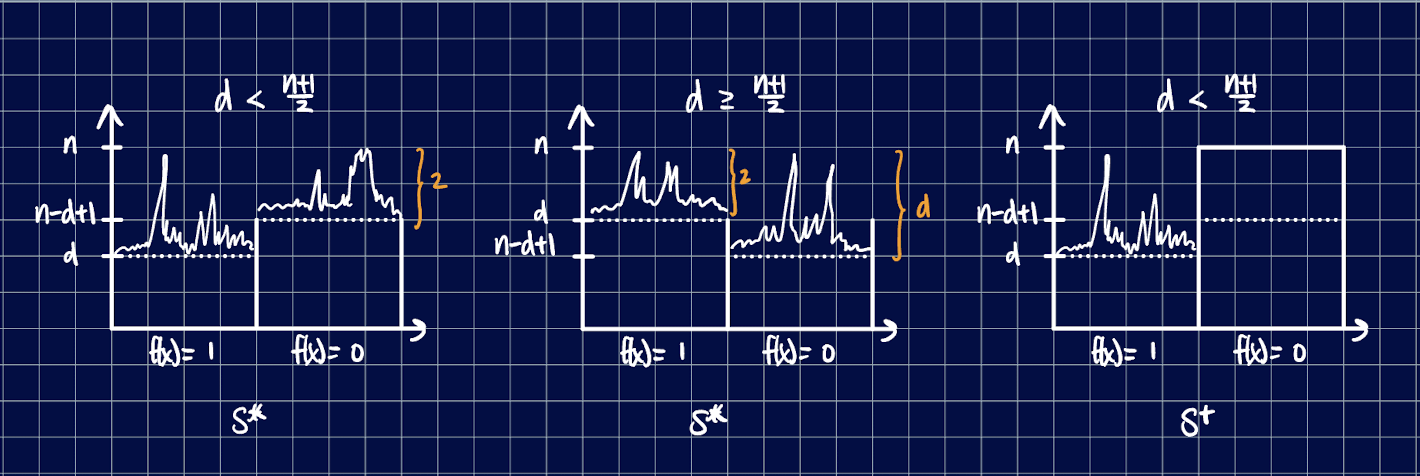

In [1]:
from IPython.display import Image, display

display(Image(filename='Strategy_visualization.png'))